In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
  Portugal, October, 2011. EUROSIS.

4. Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2011].

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None


In [10]:
df = pd.read_csv('bank-full.csv',sep=';')

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [15]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [32]:
for col in df.columns.unique():
    print(col)
    print( df[col].unique())

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
balance
[ 2143    29     2 ...  8205 14204 16353]
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration
[ 261  151   76 ... 1298 1246 1556]
campaign
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27

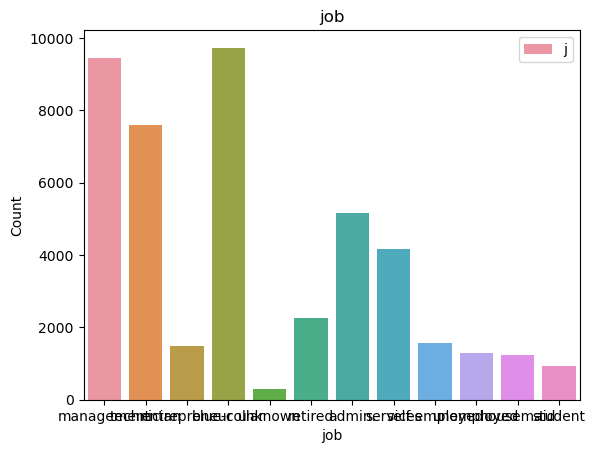

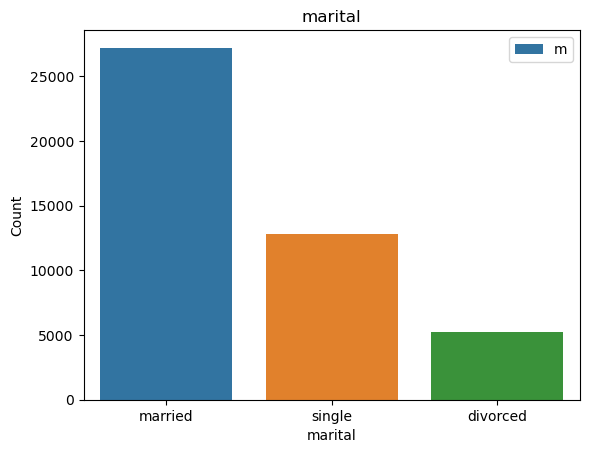

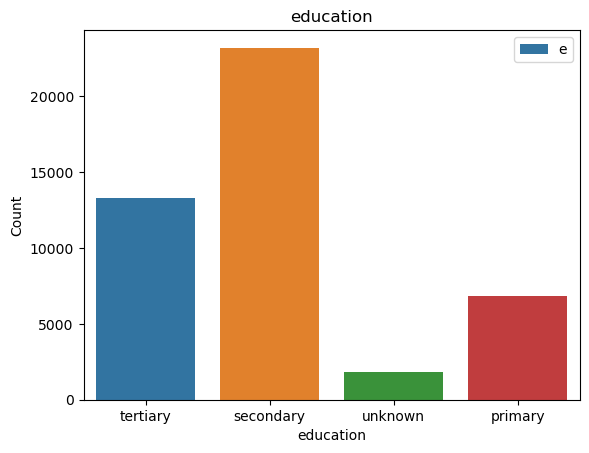

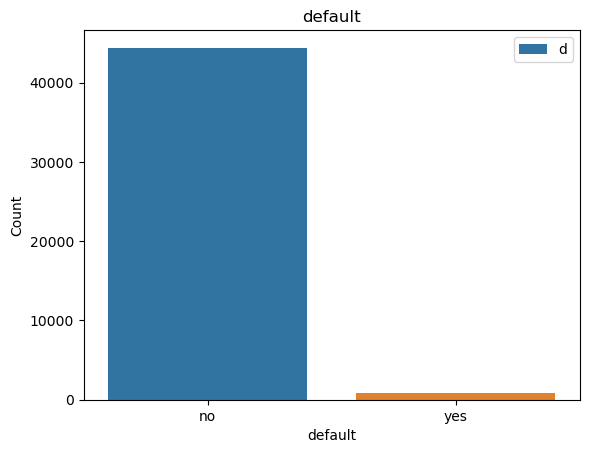

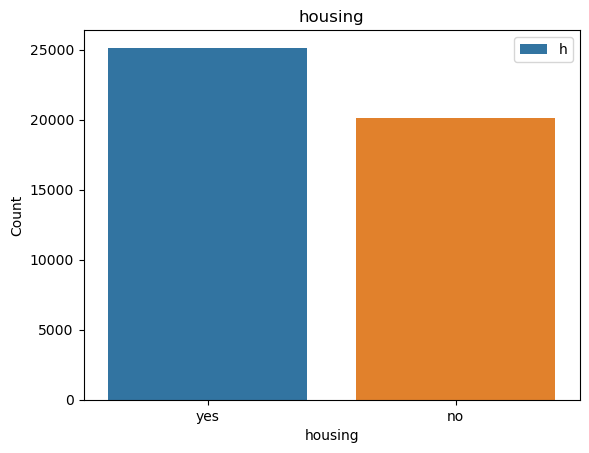

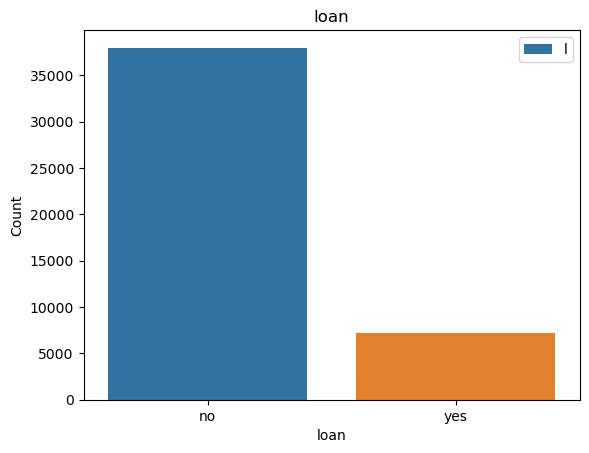

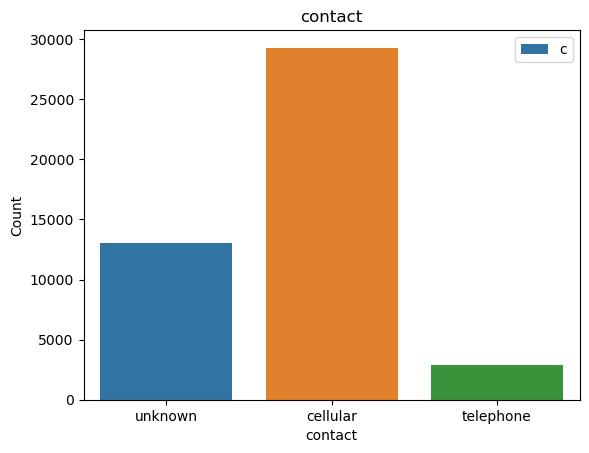

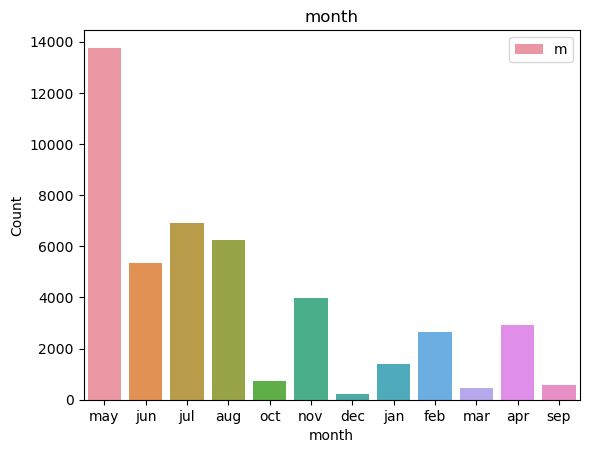

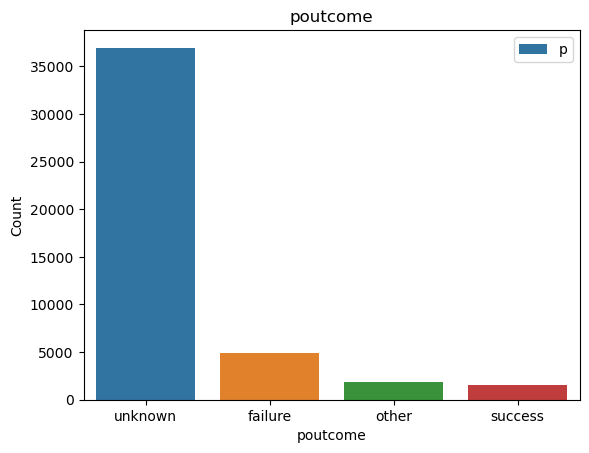

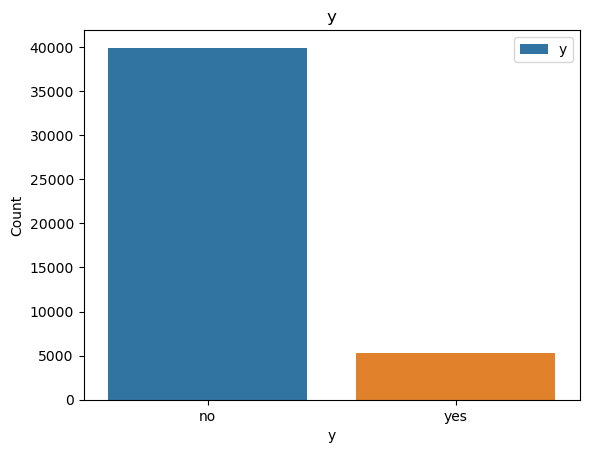

In [19]:
catigories=['job', 'marital', 'education', 'default','housing','loan', 'contact', 'month','poutcome', 'y']

for cat in catigories:
    sns.countplot(x=cat,data=df)
    plt.xlabel(cat)
    plt.ylabel('Count')
    plt.title(cat)
    plt.legend(cat)
    plt.show()
    

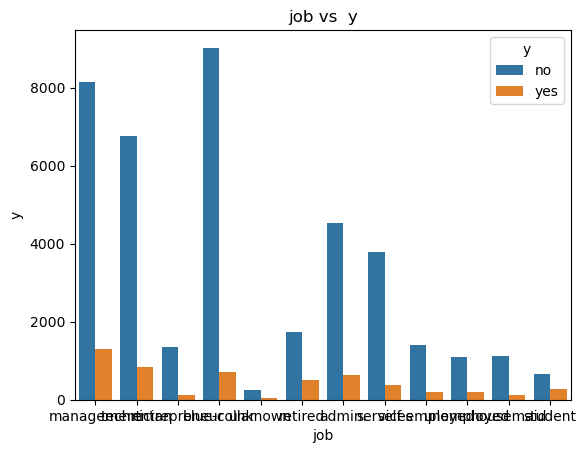

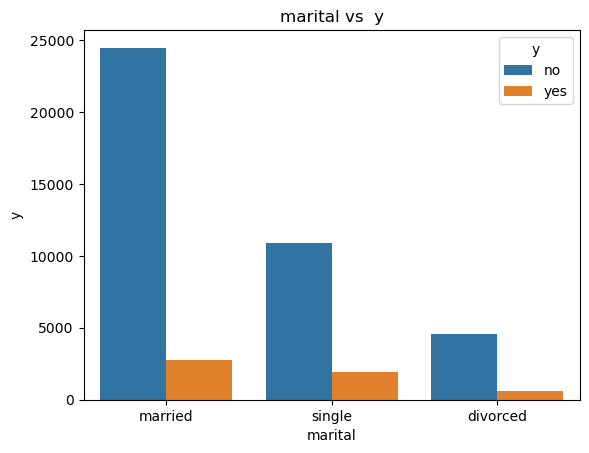

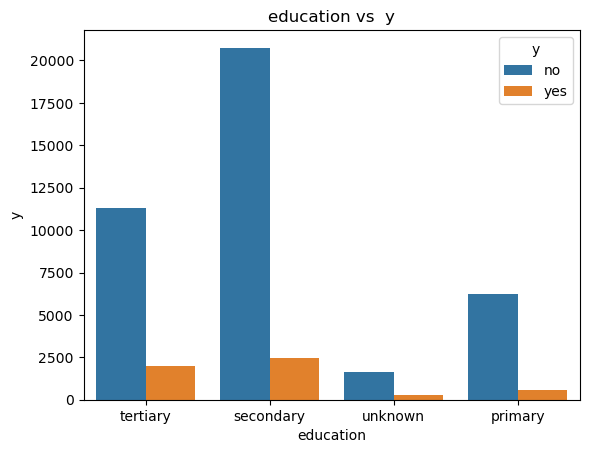

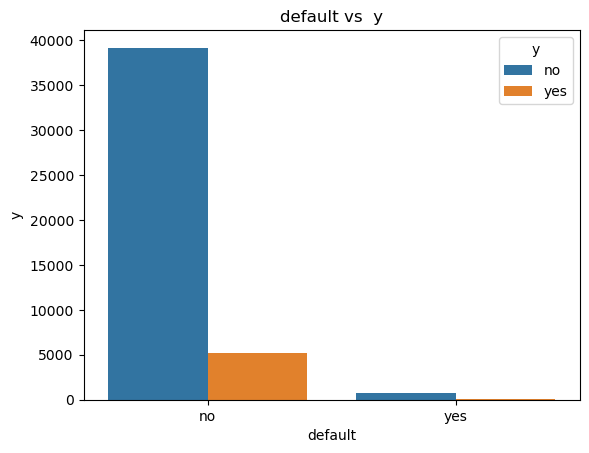

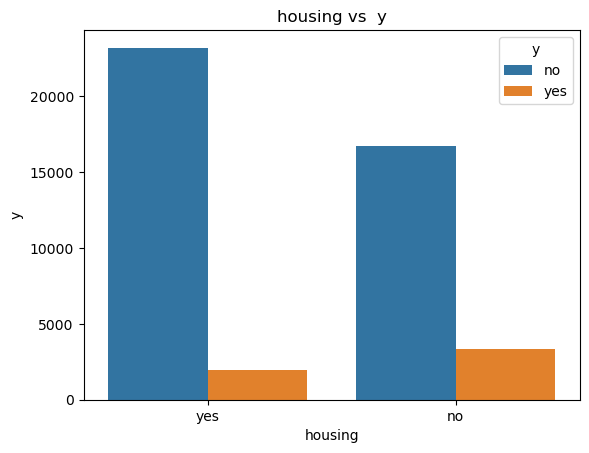

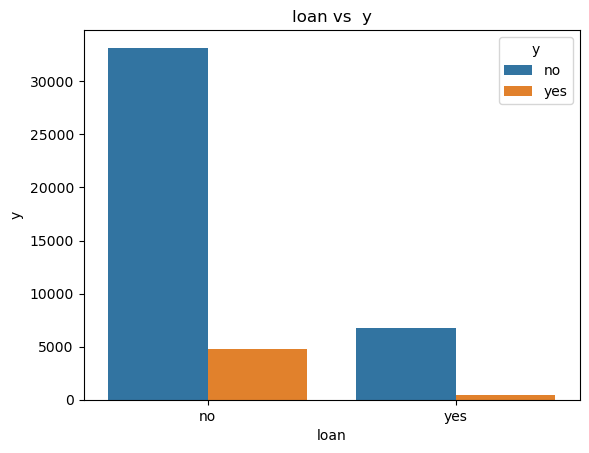

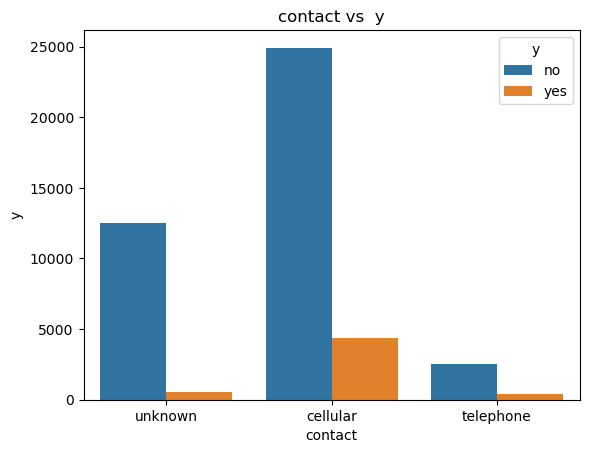

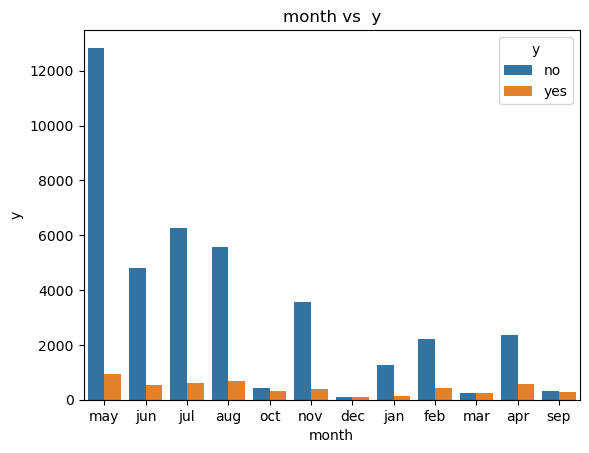

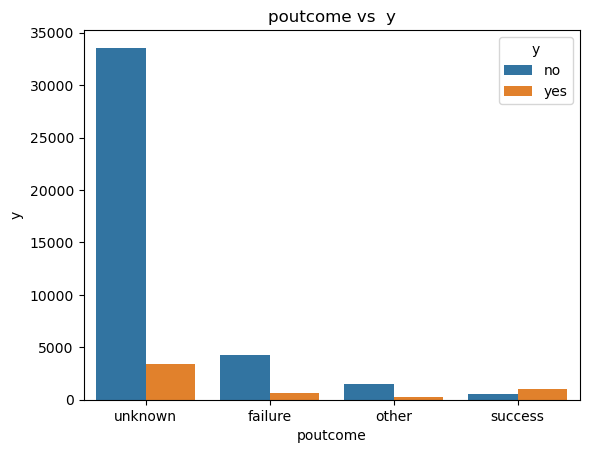

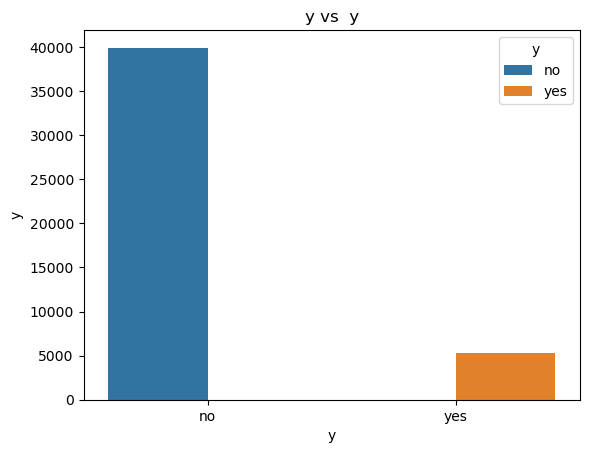

In [23]:
for cat in catigories:
    sns.countplot(x=cat,hue="y",data=df)
    plt.xlabel(cat)
    plt.ylabel('y')
    plt.title(cat+" vs  y")
    #plt.legend(cat+" vs  y")
    plt.show()
    

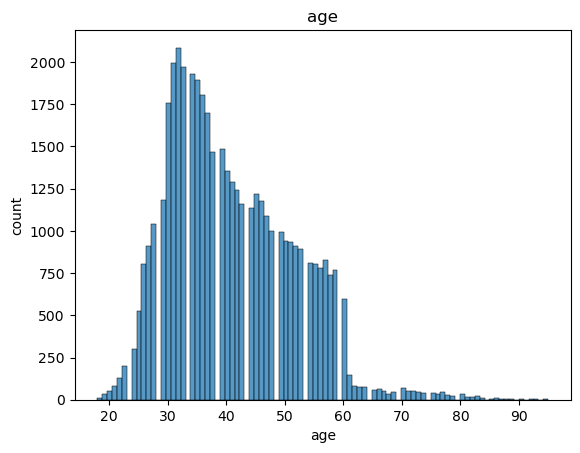

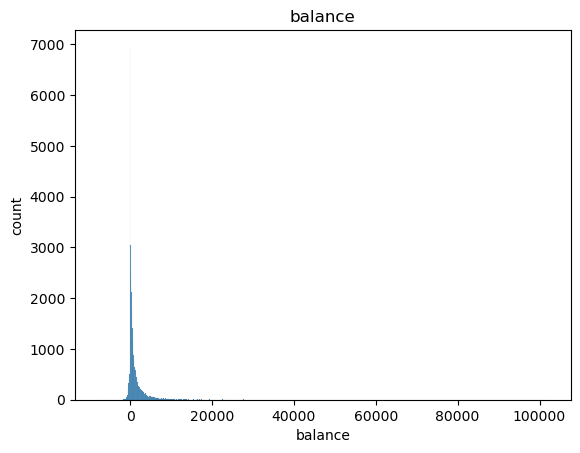

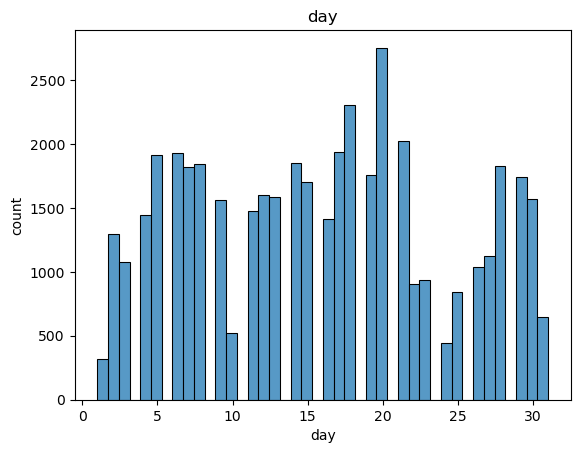

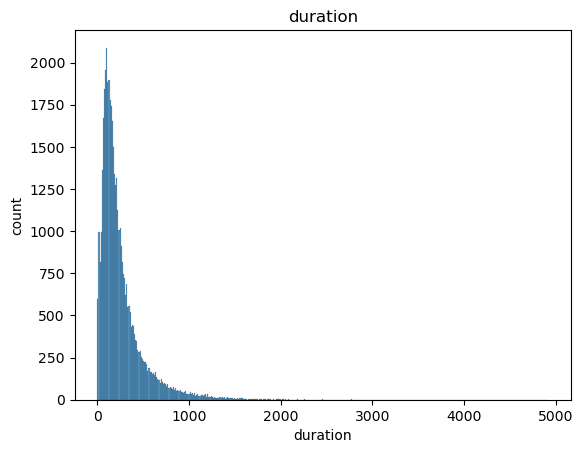

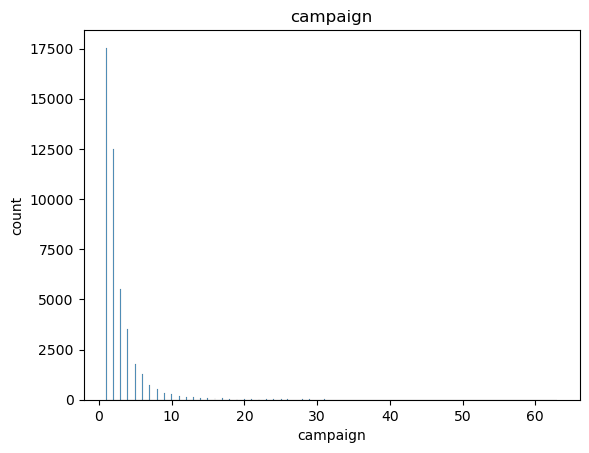

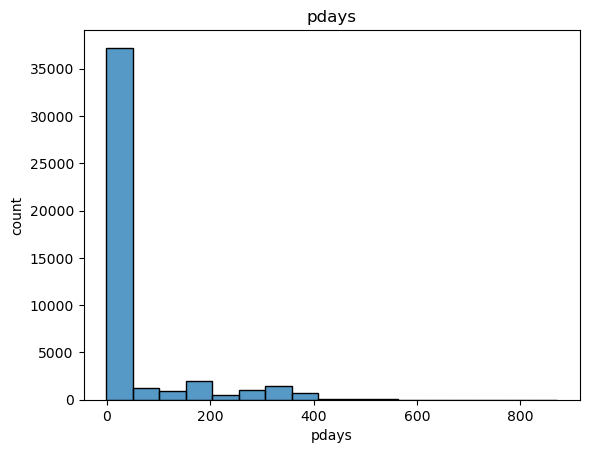

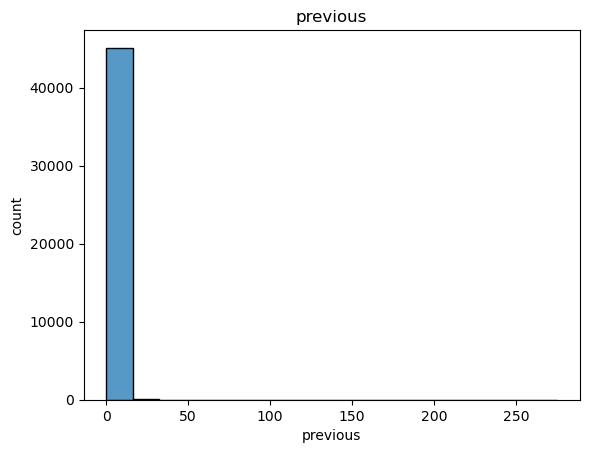

In [25]:
num=['age' ,'balance',  'day', 'duration', 'campaign', 'pdays','previous']

for n in num:
    sns.histplot(x=n,data=df)
    plt.xlabel(n)
    plt.ylabel("count")
    plt.title(n)
    plt.show()


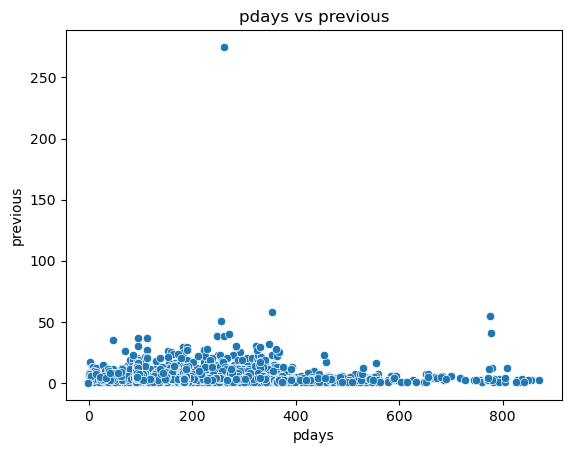

In [37]:
sns.scatterplot(x='pdays',y='previous' ,data=df)
plt.xlabel("pdays")
plt.ylabel("previous")
plt.title("pdays vs previous")
plt.show()

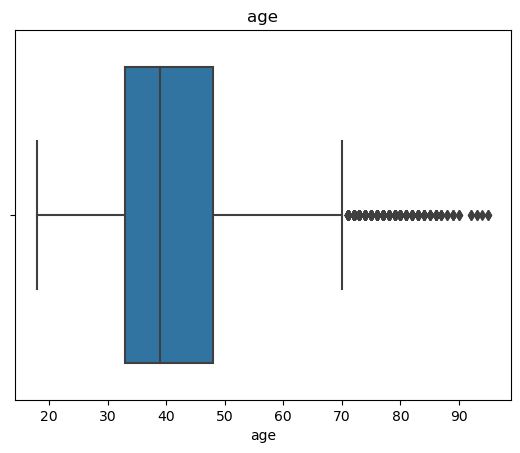

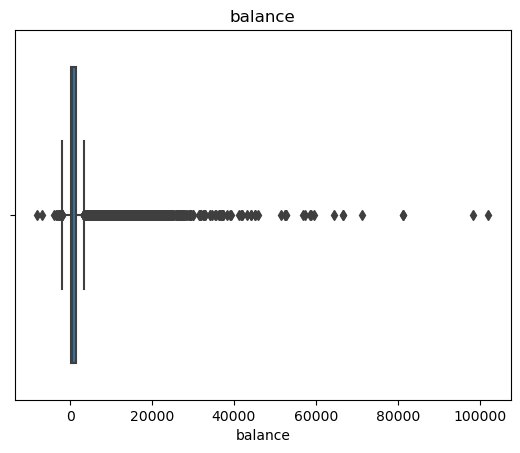

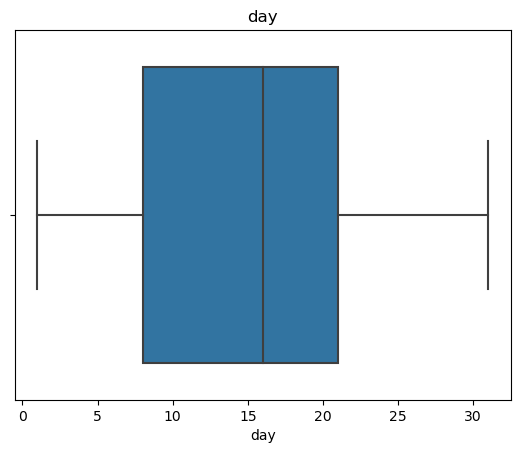

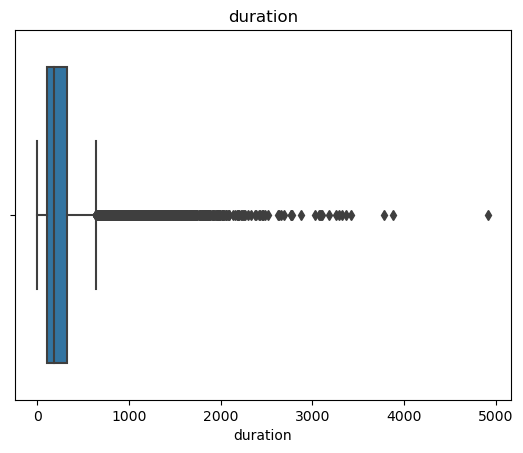

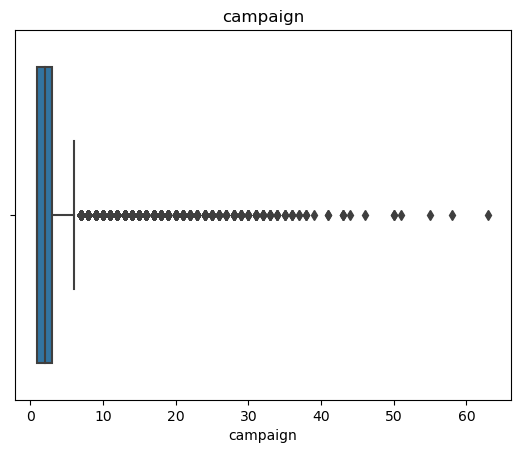

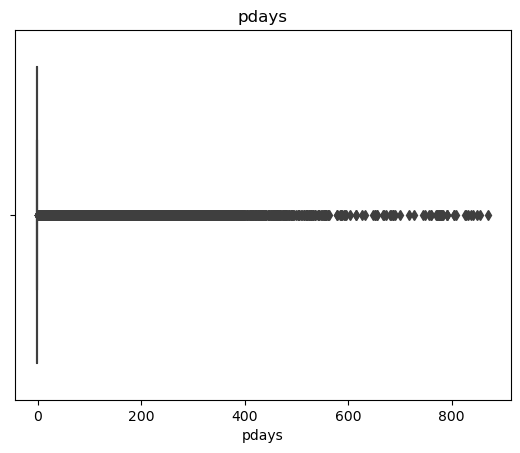

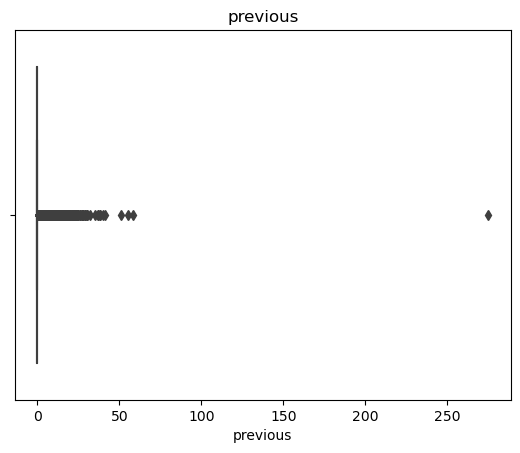

In [41]:
num=['age' ,'balance',  'day', 'duration', 'campaign', 'pdays','previous']

for c in num:
    sns.boxplot(x=c,data=df)
    plt.xlabel(c)
    plt.title(c)
    plt.show()
    

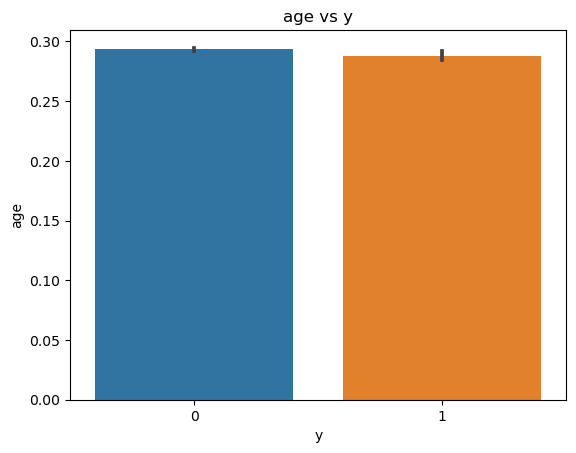

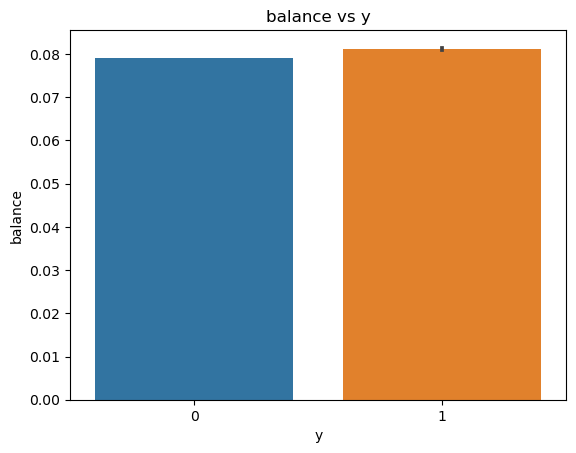

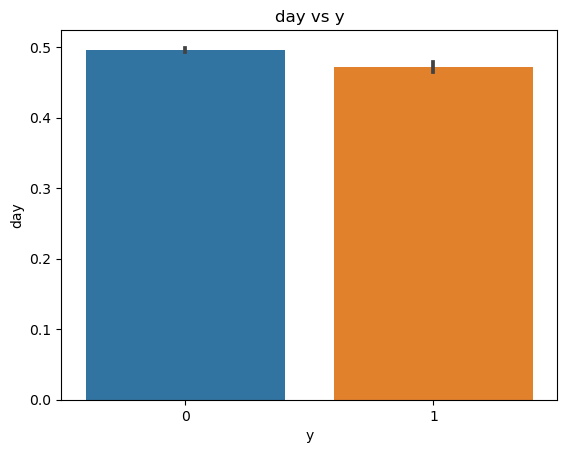

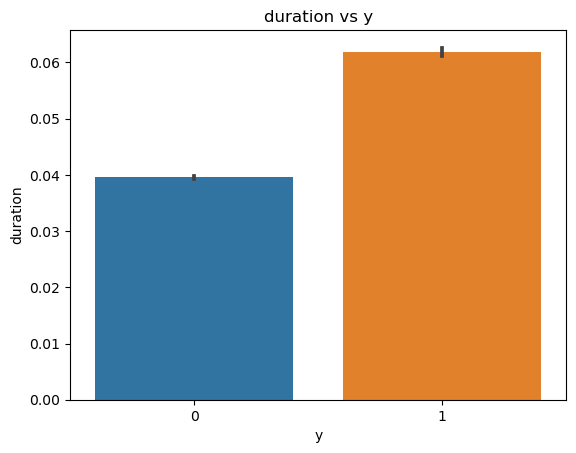

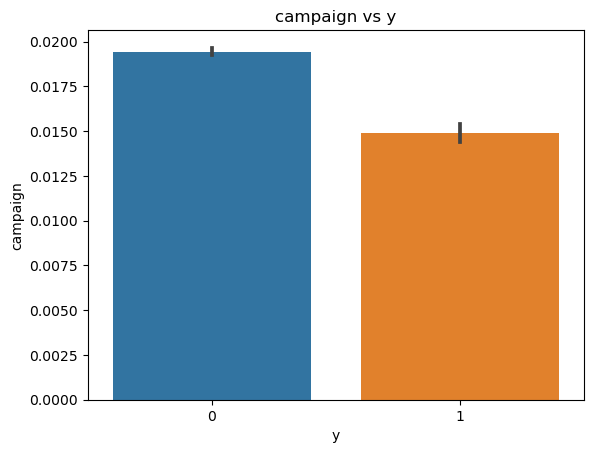

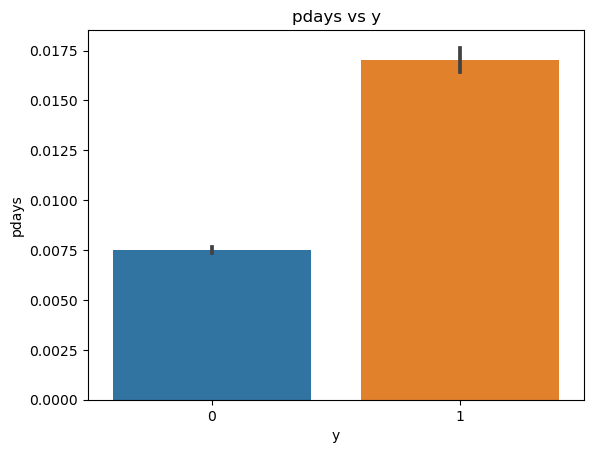

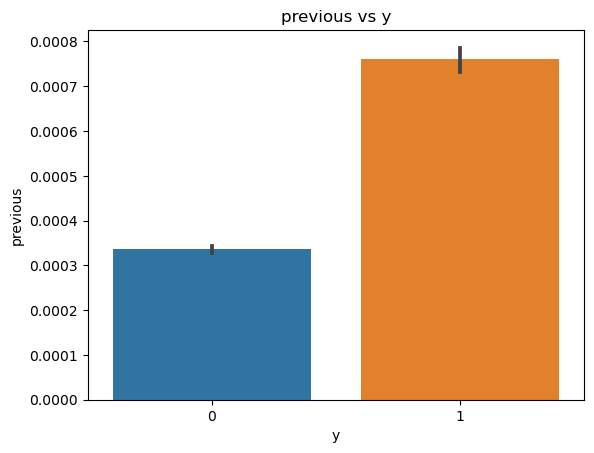

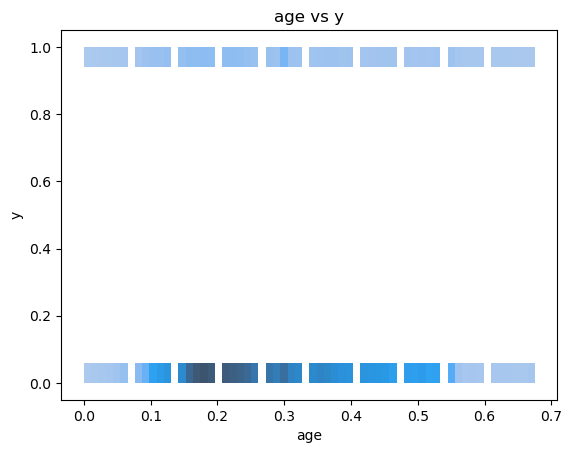

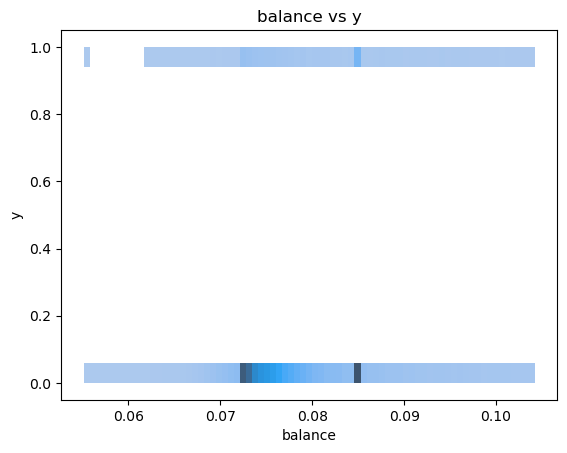

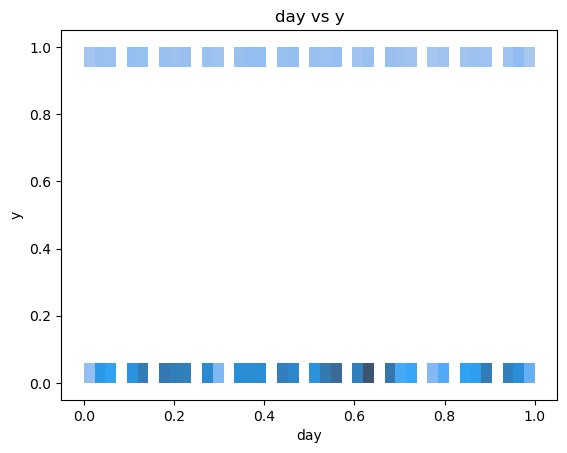

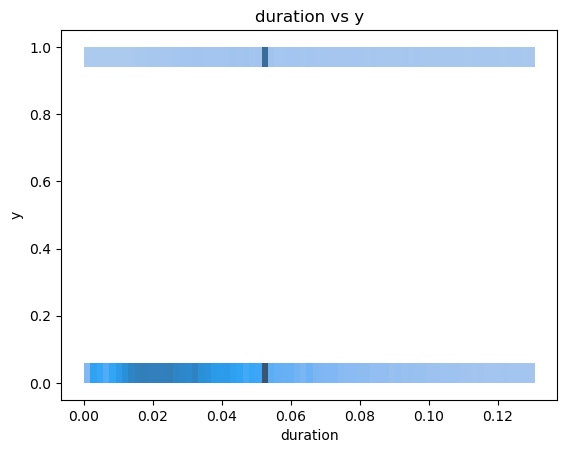

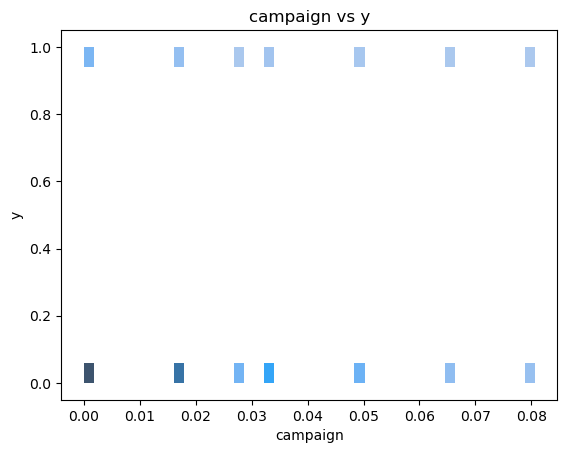

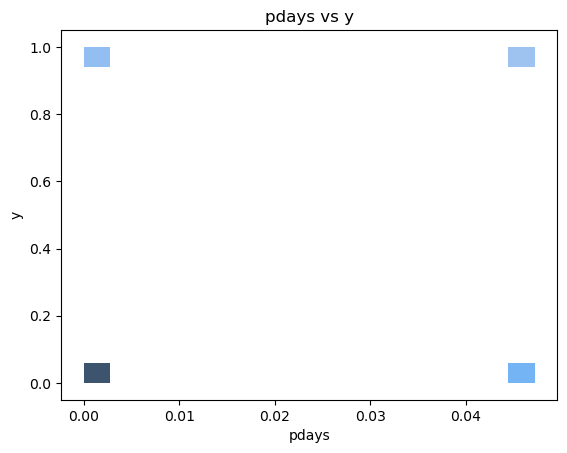

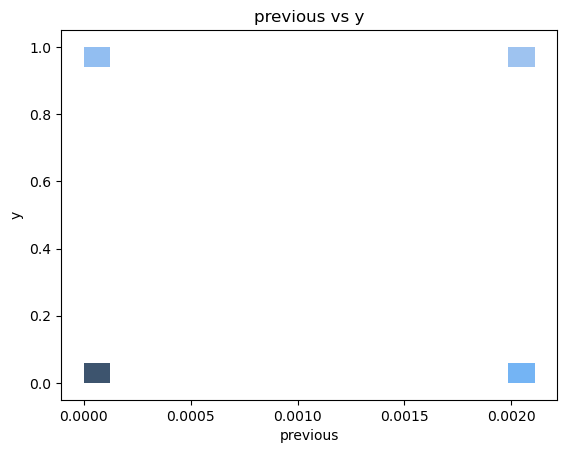

In [82]:
num=['age' ,'balance',  'day', 'duration', 'campaign', 'pdays','previous']

for c in num :
    
    sns.barplot(x='y',y=c,data=df)
    plt.xlabel("y")
    plt.ylabel(c)
    plt.title(c+" vs y")
    plt.show()
    

 

In [45]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
catg=['job', 'marital', 'education', 'default','housing','loan', 'contact', 'month','poutcome', 'y']

for cat in catg:
    df[cat]=lb.fit_transform(df[cat])



In [47]:
for cat in catg:
    print(df[cat].unique())

[ 4  9  2  1 11  5  0  7  6 10  3  8]
[1 2 0]
[2 1 3 0]
[0 1]
[1 0]
[0 1]
[2 0 1]
[ 8  6  5  1 10  9  2  4  3  7  0 11]
[3 0 1 2]
[0 1]


In [52]:
from sklearn.preprocessing import MinMaxScaler

num=['age' ,'balance',  'day', 'duration', 'campaign', 'pdays','previous']
mms = MinMaxScaler()

for n in num:
    df[n]=mms.fit_transform(df[[n]])
    




In [53]:
for n in num:
    print(df[n].unique())


[0.51948052 0.33766234 0.19480519 0.37662338 0.22077922 0.12987013
 0.31168831 0.32467532 0.2987013  0.14285714 0.45454545 0.50649351
 0.42857143 0.35064935 0.54545455 0.49350649 0.18181818 0.09090909
 0.28571429 0.27272727 0.44155844 0.36363636 0.23376623 0.4025974
 0.53246753 0.24675325 0.41558442 0.46753247 0.48051948 0.38961039
 0.07792208 0.25974026 0.16883117 0.15584416 0.11688312 0.20779221
 0.06493506 0.1038961  0.55844156 0.05194805 0.03896104 0.02597403
 0.62337662 0.57142857 0.84415584 0.74025974 0.63636364 0.67532468
 0.61038961 0.64935065 0.5974026  0.66233766 0.7012987  0.68831169
 0.01298701 0.75324675 0.87012987 0.58441558 0.93506494 0.83116883
 0.71428571 0.72727273 0.77922078 0.80519481 0.98701299 0.79220779
 0.76623377 0.88311688 1.         0.81818182 0.         0.92207792
 0.85714286 0.8961039  0.96103896 0.97402597 0.90909091]
[0.09225936 0.07306666 0.07282153 ... 0.14729541 0.20175948 0.22126995]
[0.13333333 0.16666667 0.2        0.23333333 0.26666667 0.36666667
 

In [54]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,4,1,2,0,0.092259,1,0,2,0.133333,8,0.053070,0.0,0.0,0.0,3,0
1,0.337662,9,2,1,0,0.073067,1,0,2,0.133333,8,0.030704,0.0,0.0,0.0,3,0
2,0.194805,2,1,1,0,0.072822,1,1,2,0.133333,8,0.015453,0.0,0.0,0.0,3,0
3,0.376623,1,1,3,0,0.086476,1,0,2,0.133333,8,0.018707,0.0,0.0,0.0,3,0
4,0.194805,11,2,3,0,0.072812,0,0,2,0.133333,8,0.040260,0.0,0.0,0.0,3,0


In [55]:
df.dtypes

age          float64
job            int32
marital        int32
education      int32
default        int32
balance      float64
housing        int32
loan           int32
contact        int32
day          float64
month          int32
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome       int32
y              int32
dtype: object

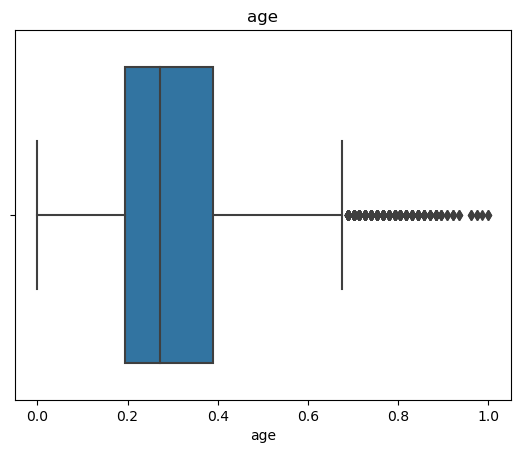

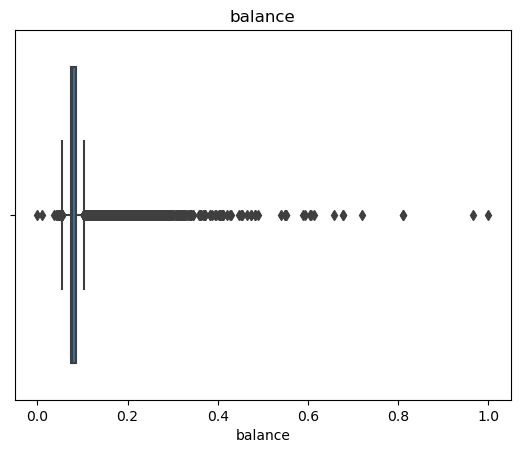

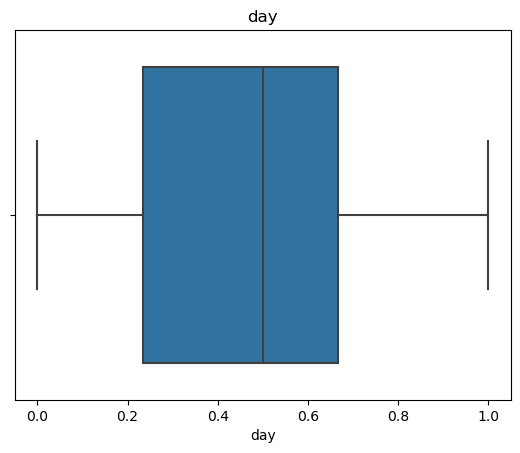

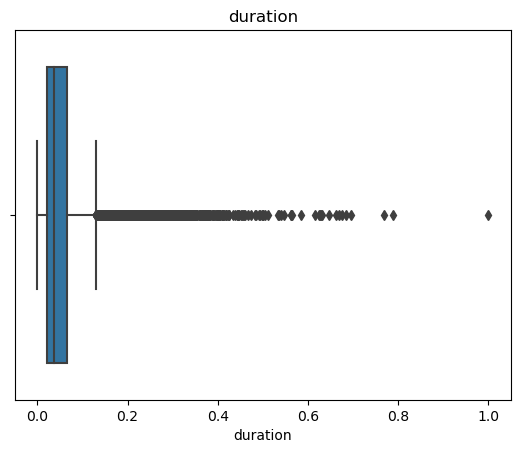

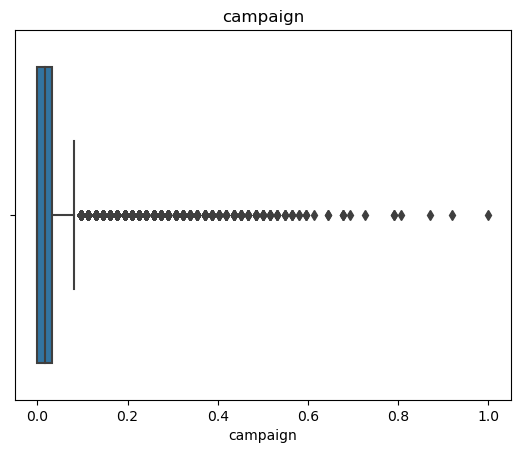

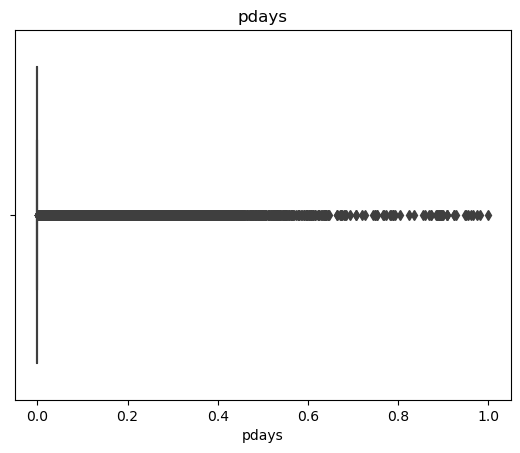

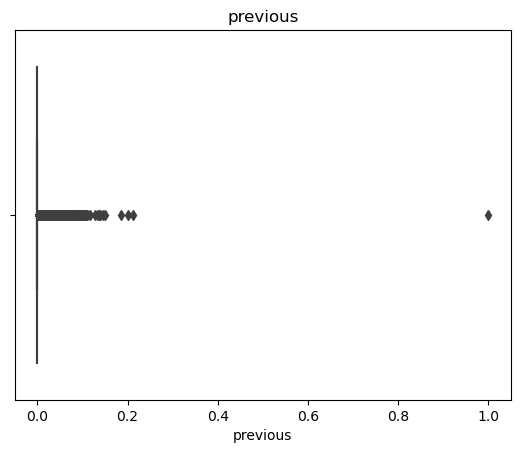

In [56]:
num=['age' ,'balance',  'day', 'duration', 'campaign', 'pdays','previous']

for c in num:
    sns.boxplot(x=c,data=df)
    plt.xlabel(c)
    plt.title(c)
    plt.show()
    

On va gerer les val aberante et nulles et puis on creer le model

In [57]:
df1=df

In [63]:
from sklearn.impute import SimpleImputer


#Pour Null

#valn = SimpleImputer(strategy = 'mean')
#null=['a','b'.....]
#for c in null:
    #df[c]=valn.fit_transform(df[[c]])
    

    
    
#Pour aberante


abr=['age','balance','duration','campaign','pdays','previous']
for a in abr:
    q1=df[a].quantile(0.25)
    q3=df[a].quantile(0.75)
    iqr=q3-q1
    
    lowerb= q1 - 1.5 * iqr
    upperb= q3 + 1.5 * iqr
    
    
    df[a]=np.where( df[a]<lowerb ,df[a].mean() , df[a])
    df[a]=np.where( df[a]>upperb ,df[a].mean() , df[a])








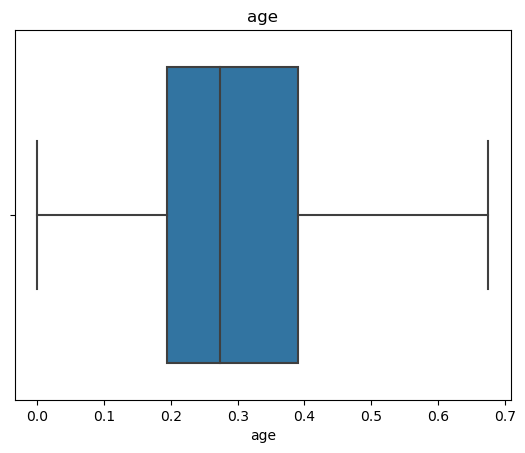

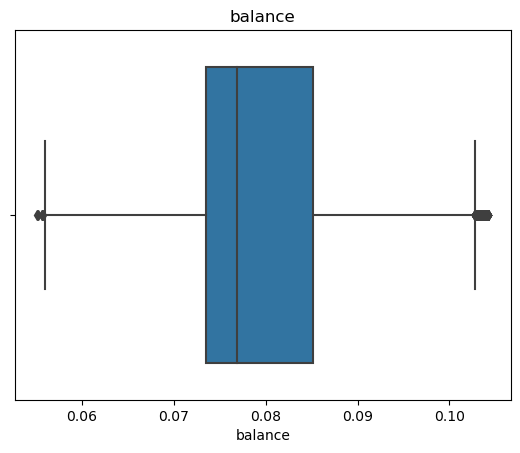

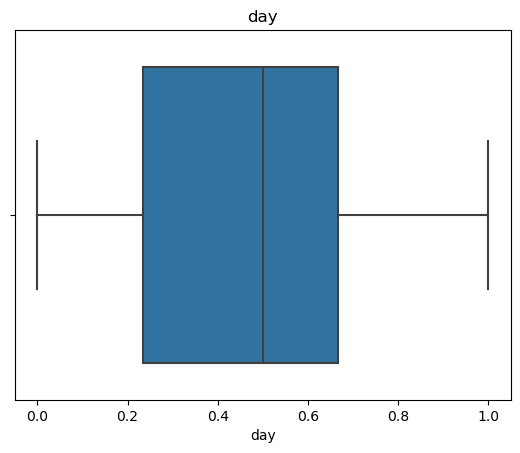

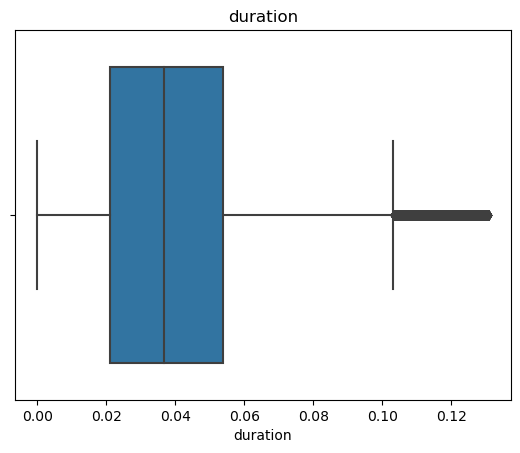

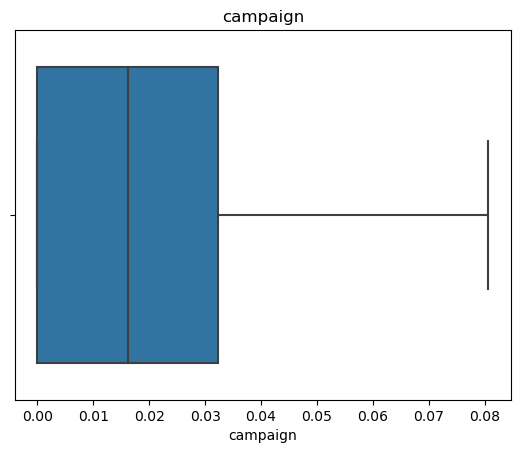

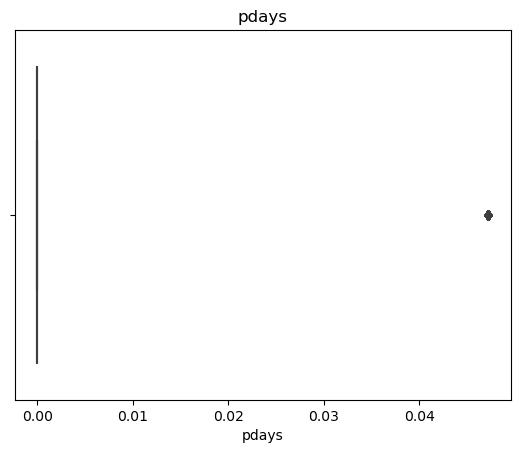

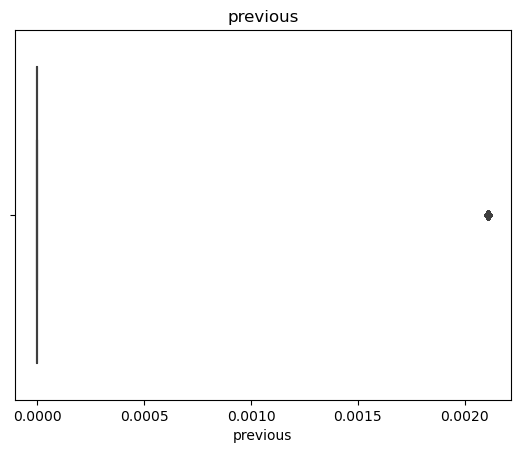

In [64]:
num=['age' ,'balance',  'day', 'duration', 'campaign', 'pdays','previous']

for c in num:
    sns.boxplot(x=c,data=df)
    plt.xlabel(c)
    plt.title(c)
    plt.show()
    

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


X=df.drop('y',axis=1)
y=df['y']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

mod = LogisticRegression(max_iter=1000)

mod.fit(X_train,y_train)

predictions = mod.predict(X_test)

accuracy = mod.score(X_test, y_test)
print("Précision du modèle :", accuracy*100)

cm = confusion_matrix(y_test, predictions)
print("Matrice de confusion :\n", cm)



Précision du modèle : 87.97965277009841
Matrice de confusion :
 [[7899   53]
 [1034   57]]
